In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

## (a)

In [22]:
ff = pd.read_csv('data/F-F_Research_Data_Factors.csv')
avg_monthly_ff = ff['Mkt-RF'].diff().mean() # unsure if this means relative returns or average rate of return
volatility_ff = ff['Mkt-RF'].std()
sharpe_ratio_ff = (ff['Mkt-RF']/volatility_ff).mean()
print("The average monthly return of the market is ")
print(avg_monthly_ff)
print("the volatility is")
print(volatility_ff)
print("The average monthly Sharpe Ratio is")
print(sharpe_ratio_ff)

The average monthly return of the market is 
-0.004779982743744636
the volatility is
5.352554226265553
The average monthly Sharpe Ratio is
0.12519321055872606


## (b) 

In [23]:
sdf = pd.read_csv('data/ps1_strategies.csv')
avg_monthly_sdf = sdf.CA.diff().mean()
volatility_sdf = sdf.CA.std() # Not sure if this works for excess returns or if I need to subtract the risk free rate
sharpe_ratio_sdf = (sdf.CA/volatility_sdf).mean()
print("The average monthly return of the CA is")
print(avg_monthly_sdf)
print("the volatility is")
print(volatility_sdf)
print("The average monthly Sharpe Ratio is")
print(sharpe_ratio_sdf)

The average monthly return of the CA is
0.015342584869578116
the volatility is
2.6293585544149796
The average monthly Sharpe Ratio is
0.27914421507930354


## (c)

In [24]:
def generate_capm(rpmrf, rm=ff['Mkt-RF']+ff.RF, rf=ff.RF):
    '''
    rp: excess return of the portfolio
    rm: excess return of the market
    rf: risk free rate
    '''
    beta = np.cov((rpmrf+rf), rm)[0, 1]/np.var(rm)
    alpha = np.mean(rpmrf) - beta*np.mean(rm - rf)
    return beta, alpha

def generate_cumulative_returns(df):
    return (((df/100)+1).cumprod() - 1)*100

## (d)

In [25]:
ff_trim = ff[ff['Month'] >= sdf['date'].min()]
ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
ff_trim = ff_trim.reset_index(drop=True)


In [26]:
beta, alpha = generate_capm(sdf.CA.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
print("The beta of the CA is")
print(beta)
print("The alpha of the CA is")
print(alpha)

The beta of the CA is
0.48846335461929824
The alpha of the CA is
0.3981855091562549


In [27]:
returns = ff_trim.RF + beta*ff_trim['Mkt-RF']

## (f)
does he want excess or total returns?

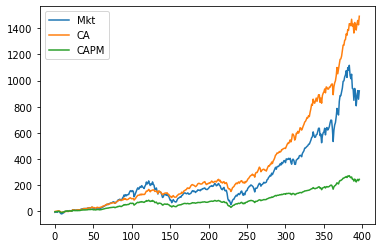

In [28]:
#plot cumulative returns, market cumulative returns, and CA cumulative returns
plt.plot(generate_cumulative_returns(ff_trim['Mkt-RF']), label='Mkt')
plt.plot(generate_cumulative_returns(sdf.CA), label='CA')
plt.plot(generate_cumulative_returns(returns - ff_trim.RF), label='CAPM')
plt.legend()

## (g)
Despite having a high alpha value, it seems that CA would not make a good hedge fund strategy as it follows the market pretty closely. It would seem that CAPM is not an appropriate model for this strategy.

# Problem 2

In [29]:
strats = pd.read_csv("data/ps1_strategies.csv")
strats

,date,CA,LBHA,LSA,TA,HV,LV,NA,LB,HB
0,199001,-1.771984,1.498262,-7.457500,1.679061,-7.271919,0.022091,-5.392944,-1.353457,-22.772632
1,199002,1.418966,3.642659,1.054500,0.205289,-0.986167,0.062055,-1.768405,-2.118514,5.151408
2,199003,1.375007,1.737180,1.738500,-1.572688,-0.018665,0.341639,-0.333926,1.452434,4.480134
3,199004,-0.395588,0.734520,-3.192000,2.474704,-3.294381,0.253568,-2.578905,2.123740,-10.101798
4,199005,2.588010,1.298923,7.999000,0.754379,8.038877,-0.113650,1.337511,-1.555230,26.259080
...,...,...,...,...,...,...,...,...,...,...
392,202209,-2.640759,0.341477,1.206628,-8.882500,-8.396274,0.138919,-8.208565,4.911723,-27.800254
393,202210,3.290022,2.849030,1.965639,7.438500,7.728801,0.099102,3.743379,2.064744,24.367165
394,202211,1.615024,0.474610,0.054055,4.370000,4.132530,0.025099,4.448278,0.730237,14.882494
395,202212,-2.144610,0.503661,1.172292,-6.089500,-3.276646,0.290945,-2.127425,-2.965015,-18.772379


In [30]:
def analyze_strategy(strat="CA", ff=pd.read_csv('data/F-F_Research_Data_Factors.csv')):
    '''
    strategy: dataframe with columns 'date' and 'CA'
    ff: dataframe with columns 'Month', 'Mkt-RF', and 'RF'
    '''
    # Trim ff to match strategy
    sdf = pd.read_csv('data/ps1_strategies.csv')
    strategy = sdf[strat]
    ff_trim = ff[ff['Month'] >= sdf['date'].min()]
    ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
    ff_trim = ff_trim.reset_index(drop=True)
    
    # Calculate strategy returns
    avg_monthly = strategy.diff().mean()
    volatility = strategy.std()
    sharpe_ratio = (strategy/volatility).mean()
    
    # Calculate CAPM
    beta, alpha = generate_capm(strategy.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
    
    # Calculate cumulative returns
    returns = ff_trim.RF + beta*ff_trim['Mkt-RF']

    plt.figure()
    plt.plot(generate_cumulative_returns(ff_trim['Mkt-RF']), label='Mkt')
    plt.plot(generate_cumulative_returns(strategy), label=strat)
    plt.plot(generate_cumulative_returns(returns - ff_trim.RF), label='CAPM for ' + strat + ' without alpha')
    plt.legend()
    
    print("------- For strategy " + strat + ": -------")
    print("The average monthly return of the strategy is ")
    print(avg_monthly)
    print("the volatility is")
    print(volatility)
    print("The average monthly Sharpe Ratio is")
    print(sharpe_ratio)
    print("The beta of the strategy is")
    print(beta)
    print("The alpha of the strategy is")
    print(alpha)
    print()
    
    return avg_monthly, volatility, sharpe_ratio, beta, alpha

------- For strategy LBHA: -------
The average monthly return of the strategy is 
-0.0029439307798812273
the volatility is
2.085658032439009
The average monthly Sharpe Ratio is
0.23299429398007837
The beta of the strategy is
0.005850592708201597
The alpha of the strategy is
0.4819245435328744

------- For strategy LSA: -------
The average monthly return of the strategy is 
0.026127282797955887
the volatility is
3.1723253621783734
The average monthly Sharpe Ratio is
0.23598688600747064
The beta of the strategy is
0.3913904338565459
The alpha of the strategy is
0.47957337177465836

------- For strategy TA: -------
The average monthly return of the strategy is 
0.011713229501608788
the volatility is
3.4570217361430466
The average monthly Sharpe Ratio is
0.21774246032131758
The beta of the strategy is
0.50890111306251
The alpha of the strategy is
0.402906154318131

------- For strategy HV: -------
The average monthly return of the strategy is 
0.03527517640347609
the volatility is
3.835627

(0.0007281683272355186,
 1.9267646547507409,
 0.24253869453036617,
 0.021084089526146273,
 0.4528211329660617)

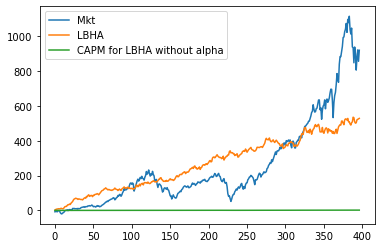

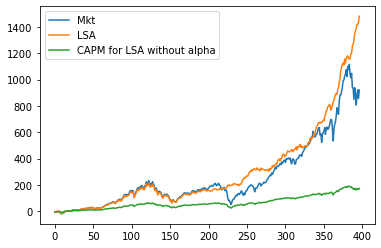

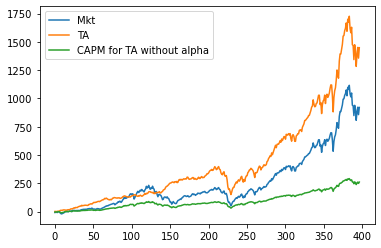

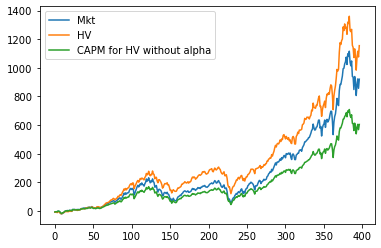

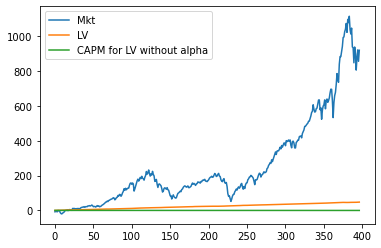

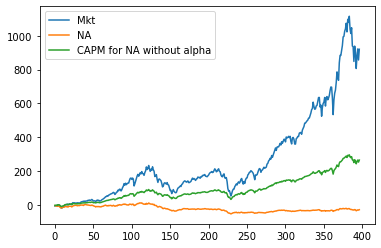

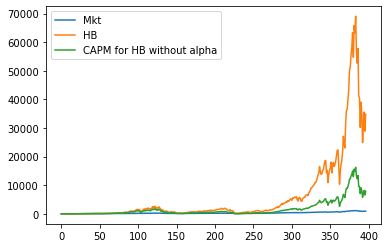

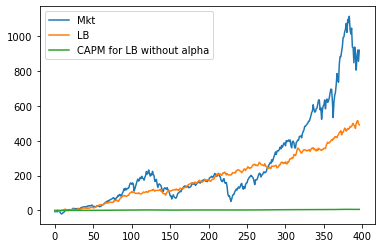

In [31]:
analyze_strategy("LBHA")
analyze_strategy("LSA")
analyze_strategy("TA")
analyze_strategy("HV")
analyze_strategy("LV")
analyze_strategy("NA")
analyze_strategy("HB")
analyze_strategy("LB")

Problem 3
note: confirm that by "cumulative" he really means "current" value

In [32]:
def fee_analysis(strat="CA", ff=pd.read_csv('data/F-F_Research_Data_Factors.csv')):
    '''
    strategy: dataframe with columns 'date' and 'CA'
    ff: dataframe with columns 'Month', 'Mkt-RF', and 'RF'
    '''
    # Trim ff to match strategy
    sdf = pd.read_csv('data/ps1_strategies.csv')
    strategy = sdf[strat]
    ff_trim = ff[ff['Month'] >= sdf['date'].min()]
    ff_trim = ff_trim[ff_trim['Month'] <= sdf['date'].max()] 
    ff_trim = ff_trim.reset_index(drop=True)
    
    # Calculate strategy returns
    avg_monthly = strategy.diff().mean()
    
    # Calculate CAPM
    beta, alpha = generate_capm(strategy.to_numpy(), (ff_trim['Mkt-RF'] + ff_trim['RF']).to_numpy(), ff_trim.RF.to_numpy())
    
    # Calculate cumulative returns
    returns = ff_trim.RF + beta*ff_trim['Mkt-RF']
    plt.plot(generate_cumulative_returns(ff_trim['Mkt-RF']), label='Mkt')
    plt.plot(generate_cumulative_returns(strategy), label=strat)
    plt.plot(generate_cumulative_returns(returns - ff_trim.RF), label='CAPM for ' + strat + ' without alpha')
    plt.legend()

    print("The average monthly return of the strategy is ")
    print(avg_monthly)
    print("the volatility is")
    print(volatility)
    print("The average monthly Sharpe Ratio is")
    print(sharpe_ratio)
    print("The beta of the strategy is")
    print(beta)
    print("The alpha of the strategy is")
    print(alpha)
    

    
def generate_capm(rpmrf, rm=ff['Mkt-RF']+ff.RF, rf=ff.RF):
    '''
    rp: excess return of the portfolio
    rm: excess return of the market
    rf: risk free rate
    '''
    beta = np.cov((rpmrf+rf), rm)[0, 1]/np.var(rm)
    alpha = np.mean(rpmrf) - beta*np.mean(rm - rf)
    return beta, alpha